# Fill missing value:
    1.Univariate imputation
    2.Multivariate imputation
![Screenshot 2024-04-04 175228.png](<attachment:Screenshot 2024-04-04 175228.png>)
    
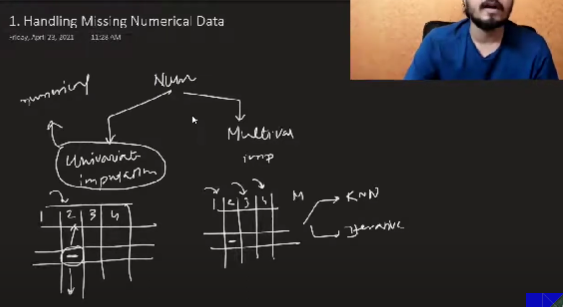

# Mean and Median Imputation

### When to use Mean and when to use Median:
    Mean->When distribution is normal then we will use Mean.
    Median->when distribution is skewd then we will use Median.
### Disadvantage:
    1.change the distribution of the data.
    2. form the outlier in data.
    3. Covariance correlation changes.
### When to use:
    1. When data is randomly missing.
    2. missing value<5%

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [51]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [53]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [56]:
x_train.shape , x_test.shape

((712, 2), (179, 2))

In [57]:
x_train.isnull().sum()

Age     148
Fare      0
dtype: int64

In [58]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

In [59]:
mean_age , median_age

(29.78590425531915, 28.75)

In [60]:
x_train['Age_median']=df['Age'].fillna(median_age)
x_train['Age_mean']=df['Age'].fillna(mean_age)

x_test['Age_median']=df['Age'].fillna(median_age)
x_test['Age_mean']=df['Age'].fillna(mean_age)

In [61]:
x_train.head()

,Age,Fare,Age_median,Age_mean
30,40.0,27.7208,40.0,40.0
10,4.0,16.7000,4.0,4.0
873,47.0,9.0000,47.0,47.0
182,9.0,31.3875,9.0,9.0
876,20.0,9.8458,20.0,20.0


In [62]:
print('Original Age variable Variance',x_train['Age'].var())
print('Age Variance after mean imputation',x_train['Age_mean'].var())
print('Age variance after median imputation',x_train['Age_median'].var())

Original Age variable Variance 204.34951339046142
Age Variance after mean imputation 161.81262452718676
Age variance after median imputation 161.98956633460548


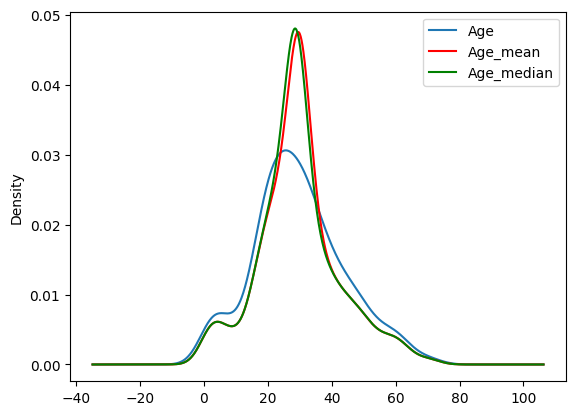

In [63]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original variable distribution
x_train['Age'].plot(kind='kde',ax=ax)

#variable imputed with mean
x_train['Age_mean'].plot(kind='kde',ax=ax,color='red')

# variable imputed with median
x_train['Age_median'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [64]:
x_train.cov()

,Age,Fare,Age_median,Age_mean
Age,204.349513,71.512440,204.349513,204.349513
Fare,71.512440,2368.246832,58.986531,56.626587
Age_median,204.349513,58.986531,161.989566,161.812625
Age_mean,204.349513,56.626587,161.812625,161.812625


<Axes: >

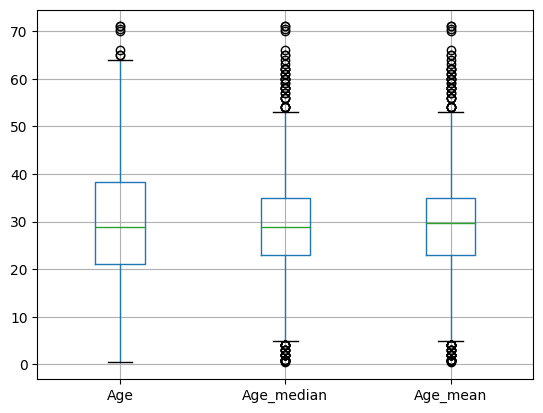

In [65]:
x_train[['Age','Age_median','Age_mean']].boxplot()

# using Sklearn

In [66]:
from sklearn.compose import ColumnTransformer

In [67]:

imputer1=SimpleImputer(strategy='mean')

trf=ColumnTransformer(
    [
        ('imputer1',imputer1,['Age'])
    ],remainder='passthrough'
)

In [68]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age'])])

In [69]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [70]:
x_test

,Age,Fare,Age_median,Age_mean
707,42.0,26.2875,42.00,42.000000
37,21.0,8.0500,21.00,21.000000
615,24.0,65.0000,24.00,24.000000
169,28.0,56.4958,28.00,28.000000
68,17.0,7.9250,17.00,17.000000
...,...,...,...,...
89,24.0,8.0500,24.00,24.000000
80,22.0,9.0000,22.00,22.000000
846,NaN,69.5500,28.75,29.785904
870,26.0,7.8958,26.00,26.000000


In [71]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [72]:
x_test

array([[ 42.        ,  26.2875    ,  42.        ,  42.        ],
       [ 21.        ,   8.05      ,  21.        ,  21.        ],
       [ 24.        ,  65.        ,  24.        ,  24.        ],
       [ 28.        ,  56.4958    ,  28.        ,  28.        ],
       [ 17.        ,   7.925     ,  17.        ,  17.        ],
       [ 30.        ,   7.8958    ,  30.        ,  30.        ],
       [ 80.        ,  30.        ,  80.        ,  80.        ],
       [ 25.        ,   7.25      ,  25.        ,  25.        ],
       [ 50.        , 133.65      ,  50.        ,  50.        ],
       [ 25.        ,  26.        ,  25.        ,  25.        ],
       [ 35.        ,  26.        ,  35.        ,  35.        ],
       [ 35.        ,  90.        ,  35.        ,  35.        ],
       [ 55.        ,  16.        ,  55.        ,  55.        ],
       [ 29.78590426,  56.4958    ,  28.75      ,  29.78590426],
       [ 29.78590426,  56.4958    ,  28.75      ,  29.78590426],
       [ 19.        ,   7

In [73]:
x_train

array([[ 40.        ,  27.7208    ,  40.        ,  40.        ],
       [  4.        ,  16.7       ,   4.        ,   4.        ],
       [ 47.        ,   9.        ,  47.        ,  47.        ],
       ...,
       [ 71.        ,  49.5042    ,  71.        ,  71.        ],
       [ 29.78590426, 221.7792    ,  28.75      ,  29.78590426],
       [ 29.78590426,  25.925     ,  28.75      ,  29.78590426]])